In [1]:
from vega_datasets import data
from matplotlib import pyplot
import pandas as pd

In [1]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

In [6]:
series.resample('Y')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

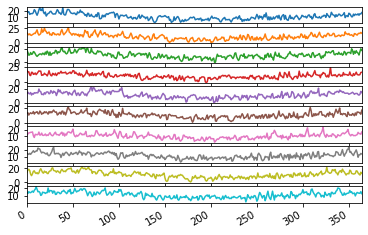

In [3]:
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)

pyplot.show()

In [11]:
groups.mean()

Date
1981-12-31    11.517260
1982-12-31    10.783562
1983-12-31    11.187397
1984-12-31    10.591781
1985-12-31    11.137534
1986-12-31    10.803288
1987-12-31    10.853151
1988-12-31    11.972055
1989-12-31    11.261918
1990-12-31    11.669589
Freq: A-DEC, Name: Temp, dtype: float64

# DATASET: SanFrancisco Temperatures

In [ ]:
temps = data.sf_temps()

###    Resample by the day and take the average temperature. Visualize the average temperature over time.


In [ ]:
temp_series = temps.set_index('date')

In [ ]:
#Resampling with 'd' picks the [agg] of each day as the sampling point. 'Mean' is the aggregration made for
#each day.
daily_temp_avgs = temp_series.resample('d').agg('mean')

In [ ]:
pyplot.plot(daily_temp_avgs)

###    Write the code necessary to visualize the minimum temperature over time.

In [ ]:
daily_low_temps = temp_series.resample('d').agg('min')

In [ ]:
#Making sure the first day is equal to what I found by resampling
temp_series['2010-01-01'].min()

In [ ]:
pyplot.plot(daily_low_temps)

###    Write the code necessary to visualize the maximum temperature over time.

In [ ]:
daily_high_temps = temp_series.resample('d').agg('max')

In [ ]:
#Plotting the high and low in the Series
pyplot.plot(daily_high_temps)
pyplot.plot(daily_low_temps)

    Which month has the highest daily temperature variability?

Which month is the coldest, on average?

In [ ]:
monthly_averages = temp_series.resample('m').agg('mean')

In [ ]:
min_temp = float(monthly_averages.min())

In [ ]:
type(min_temp)

In [ ]:
monthly_averages[monthly_averages == min_temp]

In [ ]:
temp_series['2010-01'].mean()

Which month has the highest average temperature?

In [ ]:
max_temp = float(monthly_averages.max())

In [ ]:
monthly_averages[monthly_averages == max_temp]

###    Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
    
    Use this resampled dataframe to calculate the change in temperature for the day. 

In [ ]:
mins = temp_series.resample('d').agg('min')

In [ ]:
maxs = temp_series.resample('d').agg('max')

In [ ]:
frame = {'Daily Low':mins.values,'Daily High': maxs.values}

In [ ]:
df = pd.DataFrame(temp_series.resample('d').agg('mean'))

In [ ]:
df['Daily High'] = maxs

In [ ]:
df['Daily Low'] = mins

In [ ]:
df['Daily Change'] = df['Daily High'] - df['Daily Low']

In [ ]:
df.tail()

###    Which month has the highest daily temperature variability?

In [ ]:
(df['Daily Change'].resample('m').agg('mean'))

### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [ ]:
pyplot.plot(df['Daily High'])
pyplot.plot(df['Daily Low'])
pyplot.plot(df['Daily Change'])

# NEW DATASET: Seattle Weather

In [2]:
df = data.seattle_weather()
#Forgot to change the index to a datetime index. Now we're cookin'
df = df.set_index('date')

### Which year and month combination has the highest amount of precipitation?

In [ ]:
monthly_rainfall = df.precipitation.resample('M').sum()

In [ ]:
wettest_month = monthly_rainfall.max()

In [ ]:
type(wettest_month)

In [ ]:
monthly_rainfall[monthly_rainfall == wettest_month]

###    Visualize the amount of monthly precipitation over time.

In [ ]:
pyplot.plot(monthly_rainfall)

###    Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [ ]:
df.wind.describe()

In [ ]:
pyplot.plot(df.wind.resample('M').mean())

    Which year-month combination is the windiest?

In [5]:
df.wind.resample('M').mean().sort_values().tail()

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

    What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [ ]:
df.resample('Y').sum().sort_values('precipitation')
#Looks like 2013 had the least amount of rainfaail. Least amount of wind too

    In which month does it rain the most?


In [ ]:
df.resample('M').mean().sort_values('precipitation', ascending=False).head()


    Which month has the most number of days with a non-zero amount of precipitation?

In [ ]:
df.precipitation.resample('M').sum()

In [ ]:
#df.precipitation != 0

In [ ]:
(df.loc['2015-11'].precipitation != 0).sum()

In [ ]:
df.index[0].month

In [ ]:
#There is now a column with the month of the index.
df['month'] = df.index.month

In [ ]:
df.info()

In [ ]:
#Well I lost it. Try again later....
no_rain_days = {}
for index, row in df.iterrows(): 
    if row['precipitation'] == 0:
        no_rain_days[row['month']]:
    print(row['precipitation'], row['month']) 

In [ ]:
no_rain_filter = df["precipitation"]!=0

In [ ]:
df[no_rain_filter].groupby('month').count().sort_values('precipitation')

# NEW DATASET: data.flights_20k()

In [17]:
flights_df = data.flights_20k()

In [18]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
date           20000 non-null datetime64[ns]
delay          20000 non-null int64
destination    20000 non-null object
distance       20000 non-null int64
origin         20000 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.3+ KB


    Convert any negative delays to 0.


In [19]:
#Didn't work so well. Let's try pandasWhere
#flights_df.delay.head()
flights_df['if_delay'] = flights_df.delay.where(flights_df.delay > 0, 0)

    Which hour of the day has the highest average delay?


In [20]:
#I forgot to set the index. It wasn't necessary for dealing with the integer value in the delay column.
flights_df = flights_df.set_index('date')

    Does the day of the week make a difference in the delay amount?

In [32]:
flights_df['day_of_week'] = flights_df.index.dayofweek

In [37]:
flights_df.groupby('day_of_week').sum().sort_values('delay')

,delay,distance,if_delay
day_of_week,,,
0,10716,1504996,21354
5,10936,1290733,19755
1,18256,1460784,27715
6,18965,1327880,27221
2,25129,1542607,33969
3,30850,1460862,38605
4,47220,1517386,53770


Friday look to have the most amount of delay, by any measurement

In [38]:
#If I have time, try to do this again using Series operations. That .dt.dayofweek. Or even .resample()
delays = flights_df.if_delay

    Does the month make a difference in the delay amount?

In [47]:
flights_df['month'] = flights_df.index.month

In [67]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-13 14:56:00 to 2001-03-14 11:33:00
Data columns (total 7 columns):
delay          20000 non-null int64
destination    20000 non-null object
distance       20000 non-null int64
origin         20000 non-null object
if_delay       20000 non-null int64
day_of_week    20000 non-null int64
month          20000 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [48]:
flights_df.groupby('month').sum()

,delay,distance,if_delay,day_of_week
month,,,,
1,55918,3394659,76670,18712
2,58796,3197793,76987,18225
3,47358,3512796,68732,20710


In [52]:
#flights_df.groupby('month').flights_df['delay','if_delay'].sum()

In [56]:
flights_df.groupby('month')['delay','if_delay'].sum()

,delay,if_delay
month,,
1,55918,76670
2,58796,76987
3,47358,68732


In [70]:
flights_df.groupby('month').first()
flights_df.groupby('month').last()

,delay,destination,distance,origin,if_delay,day_of_week
month,,,,,,
1,-6,MCI,1489,SEA,0,4
2,42,BNA,443,RDU,42,5
3,0,PHX,328,ABQ,0,2


In [57]:
flights_df.groupby('month')['delay','if_delay'].count()

,delay,if_delay
month,,
1,6784,6784
2,6256,6256
3,6960,6960


In [58]:
flights_df.groupby('month')['delay','if_delay'].count()/flights_df.groupby('month')['delay','if_delay'].sum()

,delay,if_delay
month,,
1,0.121321,0.088483
2,0.106402,0.081260
3,0.146966,0.101263


# NEW DATASET: Iowa Electricity

In [73]:
iowa_df = data.iowa_electricity()

In [75]:
iowa_df = iowa_df.set_index('year')


    Lineplot of generation over time, color by source
    Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
    Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
    Is the total generation increasing over time?
        How would you control for increasing consumption over time when considering how much energy is coming from each source?
        express each number as a % of the year's total


    For each row, calculate the percentage of the year's total that energy source provided.


In [78]:
iowa_df.columns

Index(['source', 'net_generation'], dtype='object')

In [79]:
iowa_df.groupby('source').sum()

,net_generation
source,
Fossil Fuels,620129
Nuclear Energy,80103
Renewables,164220


In [ ]:
iowa_df.resample()
series.resample('3T', label='right').sum()